### 1. Importing the required packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mlxtend.plotting import plot_decision_regions
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.svm import SVC
import networkx as nx
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB


### 2. Data Pre-Processing

#### 2.1 Importing the dataset

In [7]:
data = pd.read_csv('diabetes.csv')

#### 2.2 Viewing the dataset

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.shape

(768, 9)

#### 2.3 Exploring the dataset

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2.4 Checking if the dataset has null values

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

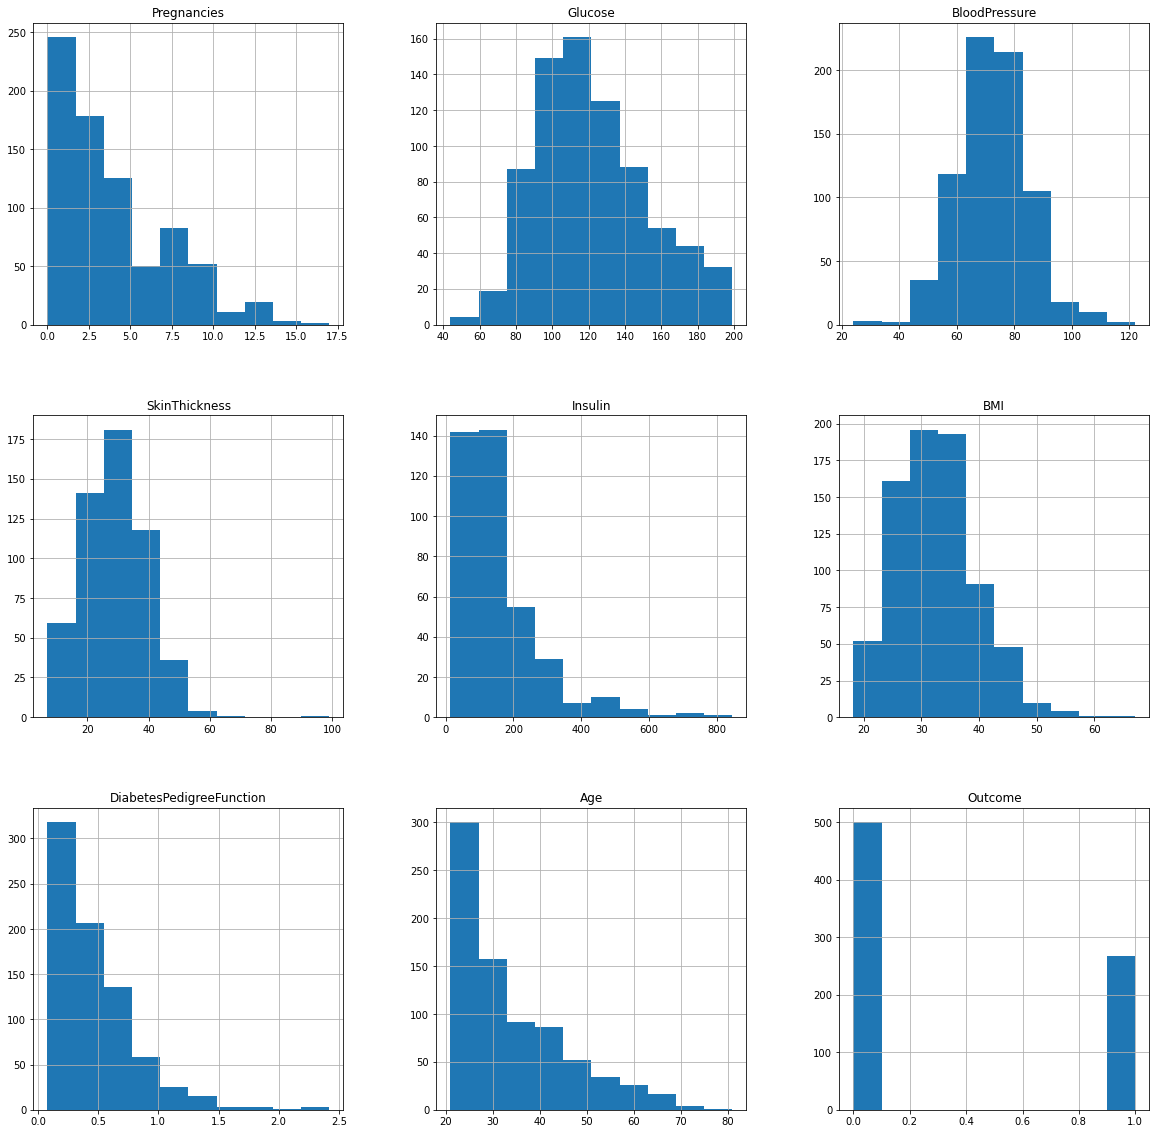

In [10]:
p = data.hist(figsize = (20,20))

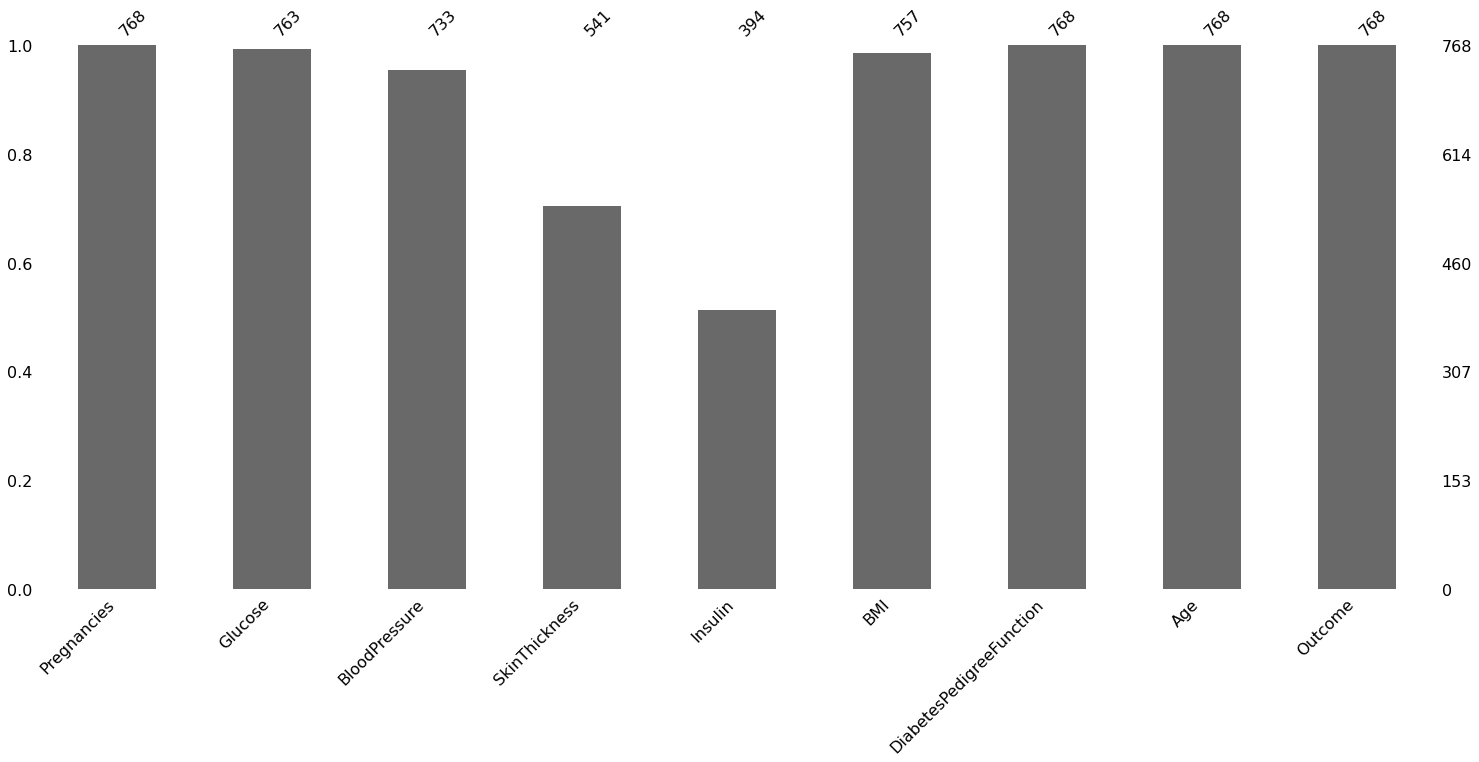

In [11]:
p = msno.bar(data)

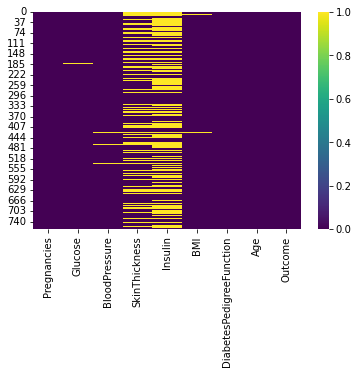

In [12]:
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()


#### 2.5 Handling the null values

In [8]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
imputer = KNNImputer(n_neighbors=5)
data[['SkinThickness', 'Insulin']] = imputer.fit_transform(data[['SkinThickness', 'Insulin']])


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

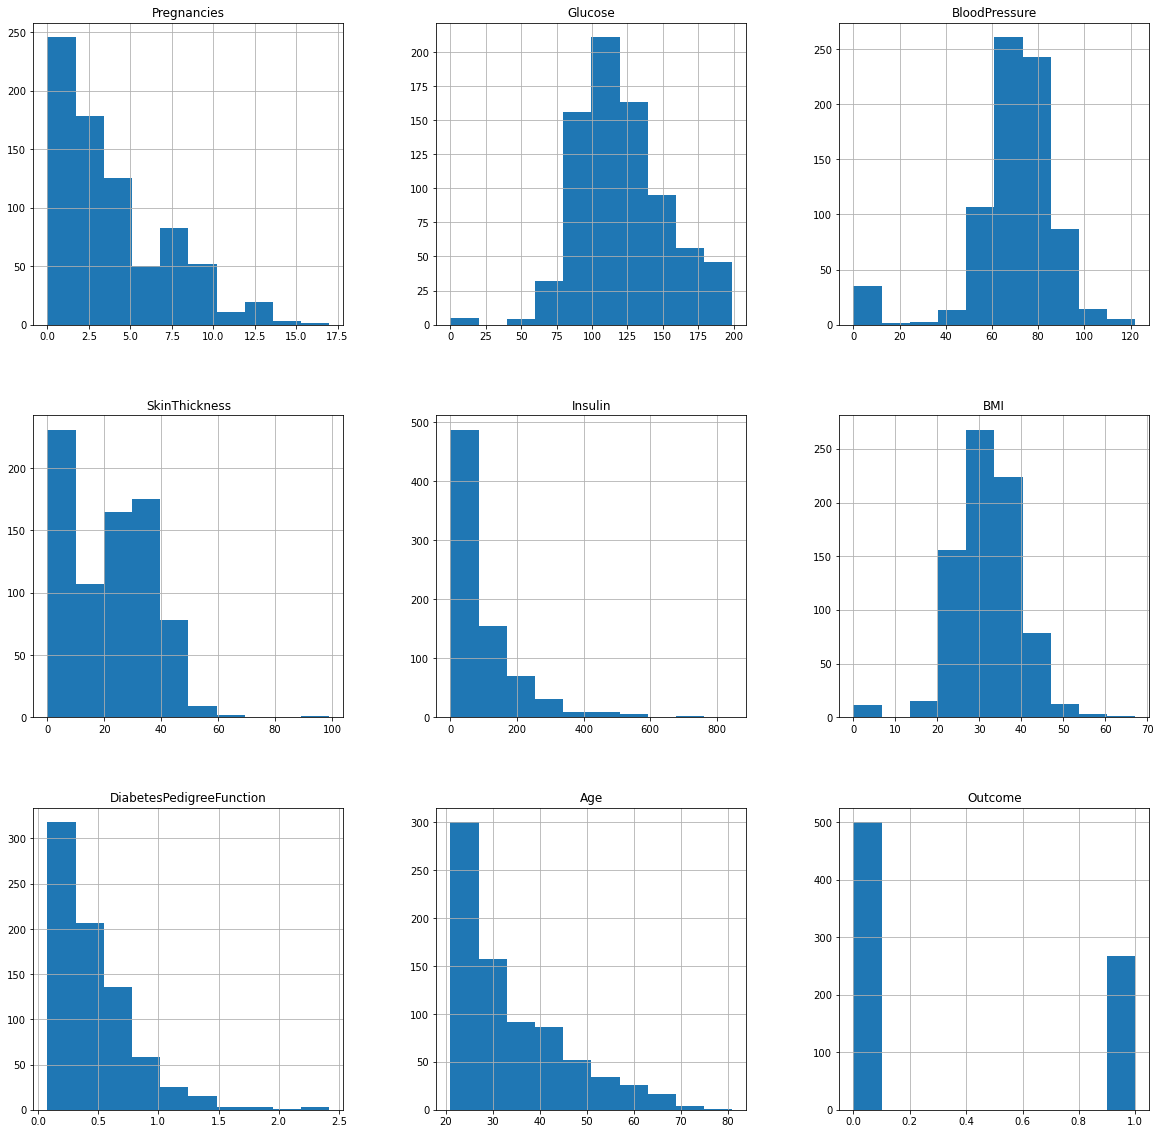

In [10]:
p = data.hist(figsize = (20,20))

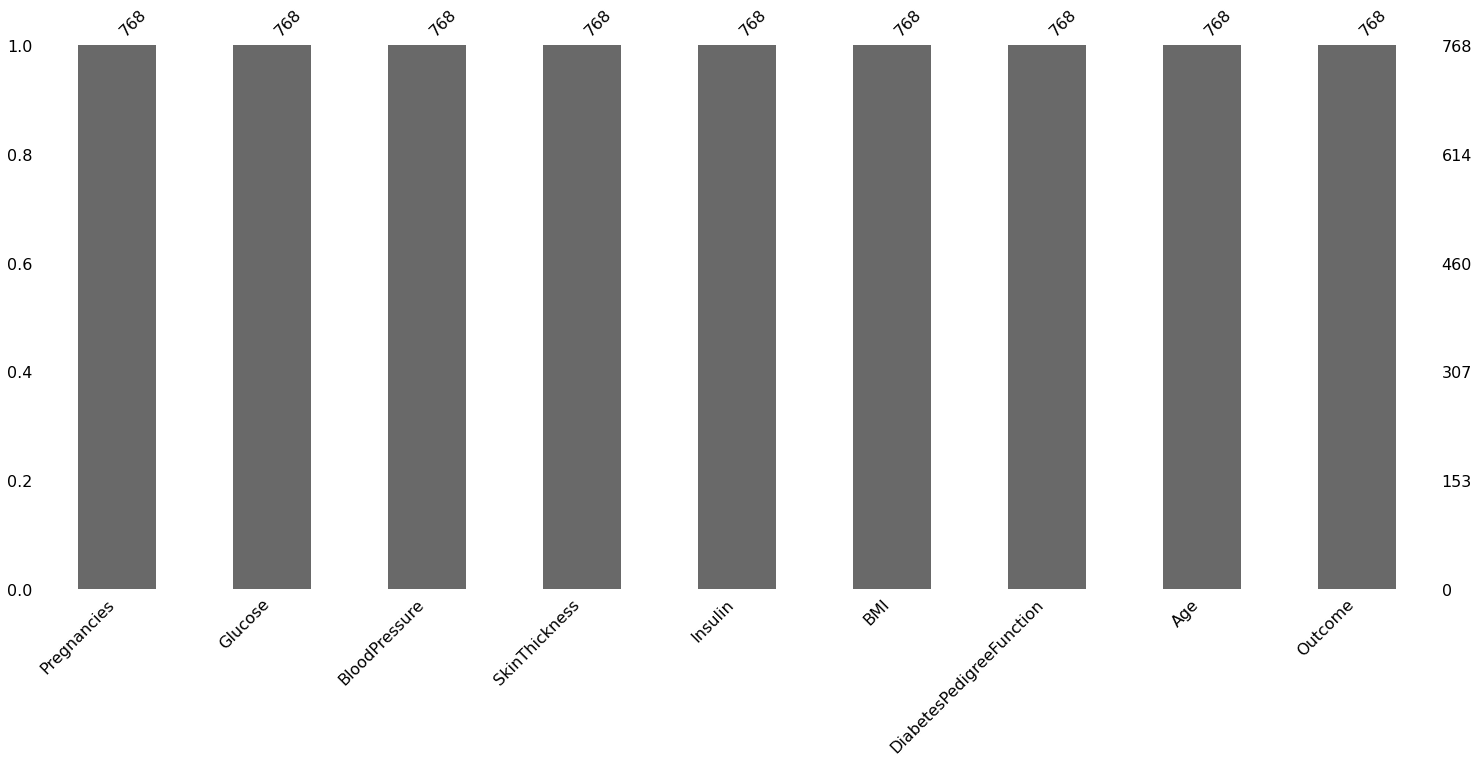

In [11]:
p = msno.bar(data)

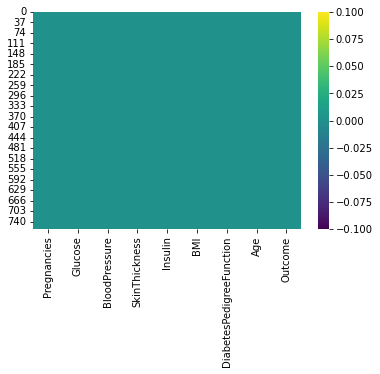

In [12]:
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()


In [ ]:
data.to_csv('NH_DB.csv')

####  2.6 Identifying the correlation between features

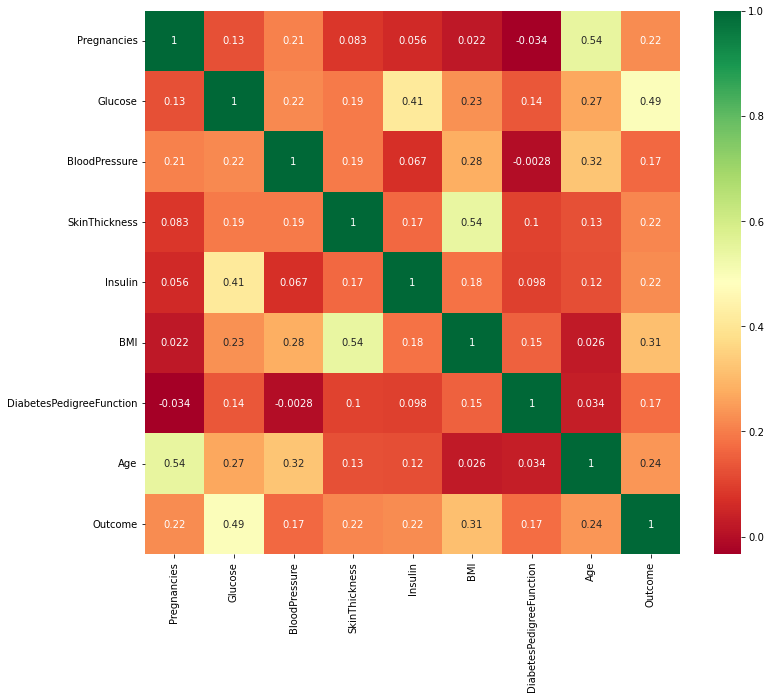

In [18]:
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')


### 3. Model Building

#### 3.1 Scaling the features

In [13]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### 3.2 Fitting different classification models

In [16]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])


#### 3.3 Appending the values to a dataframe

In [17]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.740157   0.619048  0.604651  0.611765
1        Decision Tree  0.708661   0.563830  0.616279  0.588889
2        Random Forest  0.751969   0.641975  0.604651  0.622754
3                  SVC  0.751969   0.653333  0.569767  0.608696
4                  KNN  0.704724   0.569620  0.523256  0.545455
5          Naive Bayes  0.736220   0.606742  0.627907  0.617143


In [25]:
results_df.to_csv('Original.csv', index=False)


In [19]:
fe_results = pd.read_csv('DM Prediction - Results of Base Models after Feature Engineering.csv')
fe_results

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.746753,0.653846,0.618182,0.635514
1,Decision Tree,0.681818,0.546875,0.636364,0.588235
2,Random Forest,0.753247,0.644068,0.690909,0.666667
3,SVC,0.759740,0.695652,0.581818,0.633663
4,KNN,0.772727,0.656250,0.763636,0.705882
5,Naive Bayes,0.753247,0.654545,0.654545,0.654545


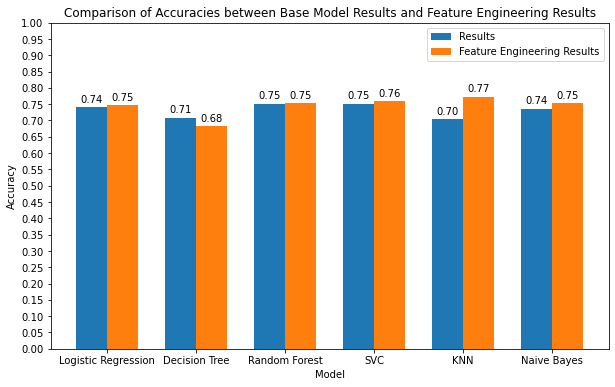

In [26]:
import matplotlib.pyplot as plt

# Assuming 'results_df' and 'fe_results' are the two dataframes

# Get the model names from either of the dataframes
model_names = results_df['Model'].tolist()

# Get the accuracies from both dataframes
accuracies_results = results_df['Accuracy'].tolist()
accuracies_fe_results = fe_results['Accuracy'].tolist()

# Set the positions for the bars on the x-axis
positions = range(len(model_names))

# Set the width of the bars
width = 0.35

# Create the bar plot with increased size
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(positions, accuracies_results, width, label='Results')
bar2 = ax.bar([p + width for p in positions], accuracies_fe_results, width, label='Feature Engineering Results')

# Set the labels, title, and ticks
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracies between Base Model Results and Feature Engineering Results')
ax.set_xticks([p + width / 2 for p in positions])
ax.set_xticklabels(model_names)
ax.legend()

# Set the y-axis interval to 0.05
ax.set_yticks([i/20 for i in range(21)])

# Display the values on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

# Show the plot
plt.show()


#### 3.4 Visualizing the metrics across different models

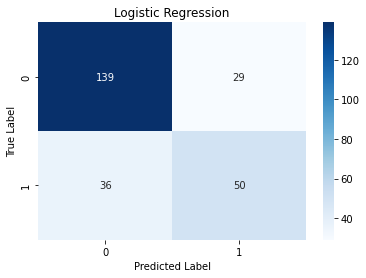

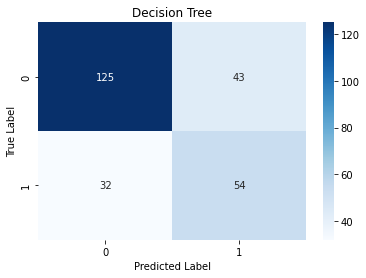

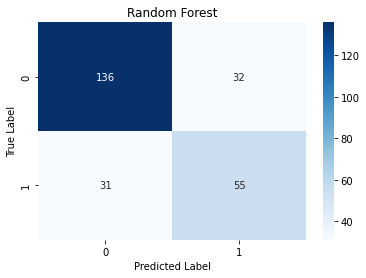

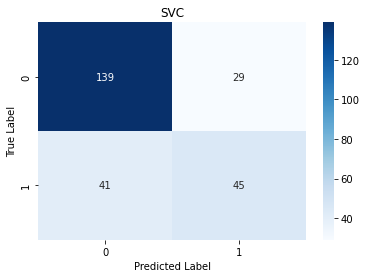

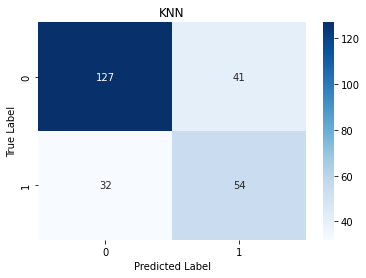

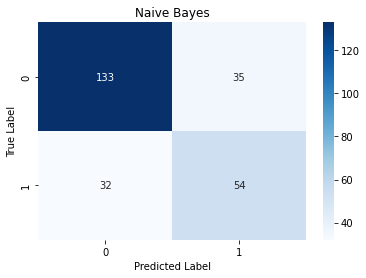

In [24]:
import seaborn as sns

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


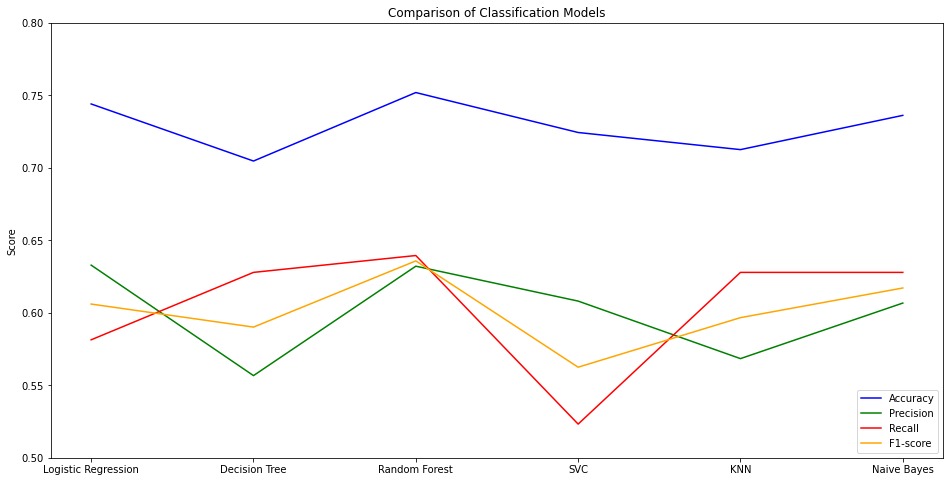

In [25]:
plt.figure(figsize=(16, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['blue', 'green', 'red', 'orange']

for i, metric in enumerate(metrics):
    plt.plot(models.keys(), results_df[metric], label=metric, color=colors[i])
    
plt.ylim([0.5, 0.8])
plt.ylabel('Score')
plt.title('Comparison of Classification Models')
plt.legend(loc='lower right')
plt.show()
